## UNEP VS. AIRQO

### Stationary monitors

1.     Hourly comparison

2.     Daily  comparison

3.     Count of daily measurements

4.     Same measures (pm2.5).

5.     Minutes comparison


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline
import re
import os
import datetime

In [4]:
def remove_special_characters(original_string):
    cleaned_string = re.sub('[^A-Za-z0-9_-]+', '', original_string)
    return cleaned_string

def create_directory(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        
def create_folder_name_representing_date(datetime_string):
    formated_date= 'Default_Date_' + datetime.datetime.today().strftime('%a_%b_%d_%Y_%H_%M_%S_%f')
    try:
        specified_date = datetime.datetime.strptime(datetime_string, '%Y-%m-%d %H:%M:%S')
        formated_date = specified_date.strftime('%a_%b_%d_%Y') 
    except e:
        pass
    finally:
        return formated_date
    

In [5]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)

In [6]:
base_dir ='AirQoUnits'
unit_name = 'AirQo_UNEP' #NEMA, #Naguru
base_dir = os.path.join(base_dir, unit_name)
print(base_dir)
is_mobile = 0
graph_title = re.sub('[^A-Za-z0-9]+', ' ', unit_name)
print(graph_title)

AirQoUnits\AirQo_UNEP
AirQo UNEP


In [7]:
data = pd.read_csv(os.path.join(base_dir,'AQ_51.csv')) #naguru_the_surgery.csv
us_embasy_data = pd.read_csv(os.path.join(base_dir,'UNEP.csv'))
data.head(10)

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8,latitude,longitude,elevation,status
0,2019-07-25 06:19:34 UTC,1,81.08,86.48,75.75,83.35,0.000000,0.000000,4.04,"0.000000,0.000000, 0.00,0.00,0.00,0.00,0.00,0.00",NaN,NaN,NaN,NaN
1,2019-07-25 06:20:57 UTC,2,75.27,81.23,69.52,78.08,1000.000000,1000.000000,4.05,"1000.000000,1000.000000,1000000.00,-1.00,255.0...",NaN,NaN,NaN,NaN
2,2019-07-25 06:27:07 UTC,3,70.85,77.80,68.28,79.55,0.357667,32.584469,4.07,"0.357667,32.584469,1205.70,0.07,6.00,103.00,0....",NaN,NaN,NaN,NaN
3,2019-07-25 06:28:28 UTC,4,67.98,74.47,68.68,78.13,0.357657,32.584427,4.08,"0.357657,32.584427,1205.70,0.09,5.00,121.00,0....",NaN,NaN,NaN,NaN
4,2019-07-25 06:29:58 UTC,5,68.93,76.75,64.97,76.67,0.357654,32.584435,4.09,"0.357654,32.584435,1205.70,0.07,5.00,121.00,0....",NaN,NaN,NaN,NaN
5,2019-07-25 06:31:19 UTC,6,66.78,75.98,65.88,76.35,0.357656,32.584438,4.09,"0.357656,32.584438,1205.80,0.02,6.00,114.00,0....",NaN,NaN,NaN,NaN
6,2019-07-25 06:32:46 UTC,7,69.50,77.43,63.37,75.12,0.357646,32.584454,4.09,"0.357646,32.584454,1203.80,0.01,8.00,92.00,0.0...",NaN,NaN,NaN,NaN
7,2019-07-25 06:34:08 UTC,8,70.20,77.18,65.62,76.35,0.357664,32.584480,4.10,"0.357664,32.584480,1191.10,0.06,7.00,99.00,0.0...",NaN,NaN,NaN,NaN
8,2019-07-25 06:35:38 UTC,9,82.90,88.85,80.10,91.87,0.357657,32.584465,4.10,"0.357657,32.584465,1191.10,0.05,7.00,99.00,0.0...",NaN,NaN,NaN,NaN
9,2019-07-25 06:37:00 UTC,10,87.22,92.77,82.08,92.03,0.357654,32.584450,4.10,"0.357654,32.584450,1213.30,0.02,8.00,92.00,0.0...",NaN,NaN,NaN,NaN


In [8]:
airquality_data_copy = data.copy()

print(airquality_data_copy.columns)
airquality_data_copy.rename(columns={'field1':'Sensor1 PM2.5_CF_1_ug/m3','field2':'Sensor1 PM10_CF_1_ug/m3',
                                     'field3':'Sensor2PM2.5_CF_1_ug/m3', 'field4':'Sensor2 PM10_CF_1_ug/m3',
                                     'field5': 'Latitude', 'field6':'Longitude', 'field7':'Battery Voltage', 
                                     'field8':'GpsData'},inplace=True)

#print(airquality_data_copy.columns)
airquality_data_of_interest = airquality_data_copy.drop(['entry_id','Latitude', 'Longitude', 'Battery Voltage','GpsData','latitude','longitude', 'elevation','status'], axis=1)

## add average of sensor 1 and sensor 2 values.
airquality_data_of_interest['Average_PM2.5_CF_1_ug/m3'] = airquality_data_of_interest[['Sensor1 PM2.5_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3']].mean(axis=1).round(2)
airquality_data_of_interest['Average_PM10_CF_1_ug/m3'] = airquality_data_of_interest[['Sensor1 PM10_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3']].mean(axis=1).round(2)


airquality_data = airquality_data_of_interest

Index(['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4',
       'field5', 'field6', 'field7', 'field8', 'latitude', 'longitude',
       'elevation', 'status'],
      dtype='object')


In [9]:
airquality_data.head()

,created_at,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
0,2019-07-25 06:19:34 UTC,81.08,86.48,75.75,83.35,78.41,84.92
1,2019-07-25 06:20:57 UTC,75.27,81.23,69.52,78.08,72.40,79.66
2,2019-07-25 06:27:07 UTC,70.85,77.80,68.28,79.55,69.56,78.68
3,2019-07-25 06:28:28 UTC,67.98,74.47,68.68,78.13,68.33,76.30
4,2019-07-25 06:29:58 UTC,68.93,76.75,64.97,76.67,66.95,76.71


In [10]:
airquality_data.tail(10)

,created_at,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
73926,2019-10-17 04:36:34 UTC,78.28,83.67,83.35,88.68,80.82,86.18
73927,2019-10-17 04:37:55 UTC,74.05,78.38,76.52,81.52,75.28,79.95
73928,2019-10-17 04:39:26 UTC,65.05,73.78,68.68,76.33,66.87,75.06
73929,2019-10-17 04:40:47 UTC,58.15,70.05,62.35,73.08,60.25,71.56
73930,2019-10-17 04:42:08 UTC,60.20,71.33,62.88,73.45,61.54,72.39
73931,2019-10-17 04:43:29 UTC,59.02,69.57,62.10,71.80,60.56,70.68
73932,2019-10-17 04:44:58 UTC,61.95,72.15,65.38,75.40,63.66,73.78
73933,2019-10-17 04:46:20 UTC,65.77,74.57,67.93,75.57,66.85,75.07
73934,2019-10-17 04:47:42 UTC,69.58,76.78,72.80,79.67,71.19,78.22
73935,2019-10-17 04:49:03 UTC,75.17,82.73,78.25,83.07,76.71,82.90


In [11]:
show_dataframe_info(airquality_data)

(73936, 7)
['created_at', 'Sensor1 PM2.5_CF_1_ug/m3', 'Sensor1 PM10_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3', 'Average_PM2.5_CF_1_ug/m3', 'Average_PM10_CF_1_ug/m3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73936 entries, 0 to 73935
Data columns (total 7 columns):
created_at                  73936 non-null object
Sensor1 PM2.5_CF_1_ug/m3    73936 non-null float64
Sensor1 PM10_CF_1_ug/m3     73936 non-null float64
Sensor2PM2.5_CF_1_ug/m3     73936 non-null float64
Sensor2 PM10_CF_1_ug/m3     73936 non-null float64
Average_PM2.5_CF_1_ug/m3    73936 non-null float64
Average_PM10_CF_1_ug/m3     73936 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.9+ MB

 dataframe info: 
 None

 dataframe column datatypes:
 created_at                   object
Sensor1 PM2.5_CF_1_ug/m3    float64
Sensor1 PM10_CF_1_ug/m3     float64
Sensor2PM2.5_CF_1_ug/m3     float64
Sensor2 PM10_CF_1_ug/m3     float64
Average_PM2.5_CF_1_ug/m3    float64
Average_PM10_CF_1_ug/m

In [12]:
airquality_data["TimeStamp"] = pd.to_datetime(airquality_data["created_at"])
is_utc_date = airquality_data['created_at'].loc[0]
print(is_utc_date)

if "UTC" in is_utc_date:
    print('utc found')
    airquality_data["TimeStamp"] = airquality_data["TimeStamp"]+ datetime.timedelta(hours=3)
    
time_indexed_data = airquality_data.set_index('TimeStamp')
time_indexed_data = time_indexed_data.drop(['created_at'], axis=1)

2019-07-25 06:19:34 UTC
utc found


In [19]:
time_indexed_data.head(10)

,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
TimeStamp,,,,,,
2019-07-25 09:19:34,81.08,86.48,75.75,83.35,78.41,84.92
2019-07-25 09:20:57,75.27,81.23,69.52,78.08,72.40,79.66
2019-07-25 09:27:07,70.85,77.80,68.28,79.55,69.56,78.68
2019-07-25 09:28:28,67.98,74.47,68.68,78.13,68.33,76.30
2019-07-25 09:29:58,68.93,76.75,64.97,76.67,66.95,76.71
2019-07-25 09:31:19,66.78,75.98,65.88,76.35,66.33,76.16
2019-07-25 09:32:46,69.50,77.43,63.37,75.12,66.44,76.28
2019-07-25 09:34:08,70.20,77.18,65.62,76.35,67.91,76.76
2019-07-25 09:35:38,82.90,88.85,80.10,91.87,81.50,90.36


In [13]:
time_indexed_data.tail(10)

,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
TimeStamp,,,,,,
2019-10-17 04:36:34,78.28,83.67,83.35,88.68,80.82,86.18
2019-10-17 04:37:55,74.05,78.38,76.52,81.52,75.28,79.95
2019-10-17 04:39:26,65.05,73.78,68.68,76.33,66.87,75.06
2019-10-17 04:40:47,58.15,70.05,62.35,73.08,60.25,71.56
2019-10-17 04:42:08,60.20,71.33,62.88,73.45,61.54,72.39
2019-10-17 04:43:29,59.02,69.57,62.10,71.80,60.56,70.68
2019-10-17 04:44:58,61.95,72.15,65.38,75.40,63.66,73.78
2019-10-17 04:46:20,65.77,74.57,67.93,75.57,66.85,75.07
2019-10-17 04:47:42,69.58,76.78,72.80,79.67,71.19,78.22


In [14]:
time_indexed_data.shape

(73936, 6)

In [15]:
#time_indexed_data = time_indexed_data['2019-07-01 00:00:00':'2019-07-31 23:59:59']

### Hourly Summaries

In [20]:
airqo_hourly_airquality_data_concentrations_std= time_indexed_data.resample('H').std().round(2)
airqo_hourly_airquality_data_concentrations_mean  = time_indexed_data.resample('H').mean().round(2)
airqo_hourly_airquality_data_concentrations_max  = time_indexed_data.resample('H').max().round(2)
airqo_hourly_airquality_data_concentrations_min  = time_indexed_data.resample('H').min().round(2)

In [21]:
show_dataframe_info(airqo_hourly_airquality_data_concentrations_mean)

(2015, 6)
['Sensor1 PM2.5_CF_1_ug/m3', 'Sensor1 PM10_CF_1_ug/m3', 'Sensor2PM2.5_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3', 'Average_PM2.5_CF_1_ug/m3', 'Average_PM10_CF_1_ug/m3']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2015 entries, 2019-07-25 09:00:00 to 2019-10-17 07:00:00
Freq: H
Data columns (total 6 columns):
Sensor1 PM2.5_CF_1_ug/m3    1751 non-null float64
Sensor1 PM10_CF_1_ug/m3     1751 non-null float64
Sensor2PM2.5_CF_1_ug/m3     1751 non-null float64
Sensor2 PM10_CF_1_ug/m3     1751 non-null float64
Average_PM2.5_CF_1_ug/m3    1751 non-null float64
Average_PM10_CF_1_ug/m3     1751 non-null float64
dtypes: float64(6)
memory usage: 110.2 KB

 dataframe info: 
 None

 dataframe column datatypes:
 Sensor1 PM2.5_CF_1_ug/m3    float64
Sensor1 PM10_CF_1_ug/m3     float64
Sensor2PM2.5_CF_1_ug/m3     float64
Sensor2 PM10_CF_1_ug/m3     float64
Average_PM2.5_CF_1_ug/m3    float64
Average_PM10_CF_1_ug/m3     float64
dtype: object


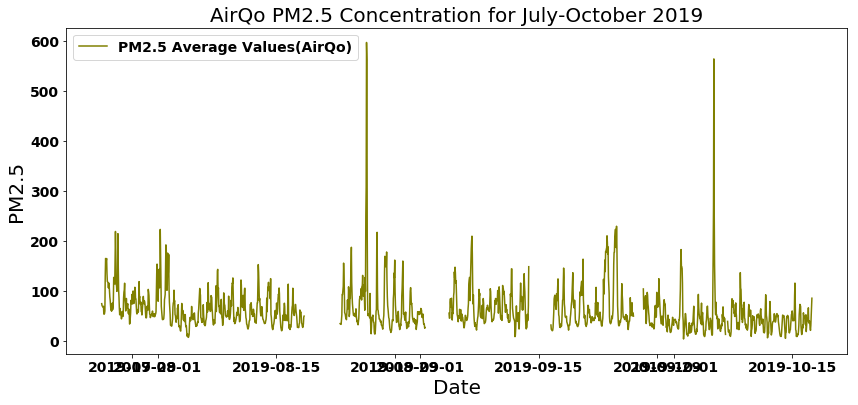

<Figure size 432x288 with 0 Axes>

In [22]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(airqo_hourly_airquality_data_concentrations_mean.index, 
             airqo_hourly_airquality_data_concentrations_mean['Average_PM2.5_CF_1_ug/m3'], 
             color='olive', linestyle='solid', label='PM2.5 Average Values(AirQo)') #marker='o', 
    #plt.plot(airqo_hourly_airquality_data_concentrations_max.index, 
             #airqo_hourly_airquality_data_concentrations_max['Average_PM2.5_CF_1_ug/m3'], 
             #color='chocolate', marker='x', linestyle='solid', label='PM2.5 Maximum Values')
    #plt.plot(airqo_hourly_airquality_data_concentrations_min.index, 
             #airqo_hourly_airquality_data_concentrations_min['Average_PM2.5_CF_1_ug/m3'], 
             #color='darkcyan', marker='*', linestyle='solid', label='PM2.5 Minimum Values')
    
    chart_title =  'AirQo PM2.5 Concentration for July-October 2019'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    plt.tight_layout()
    fig.savefig(os.path.join(base_dir,'hourly_pm25_concentration_airqo_july_august_2019.png'))

### Daily summaries

In [23]:
all_sensor_daily_airquality_data_concentrations_std= time_indexed_data.resample('H').std().round(2)
all_sensor_daily_airquality_data_concentrations_mean  = time_indexed_data.resample('D').mean().round(2)
all_sensor_daily_airquality_data_concentrations_median  = time_indexed_data.resample('D').median().round(2)
all_sensor_daily_airquality_data_concentrations_max  = time_indexed_data.resample('D').max().round(2)
all_sensor_daily_airquality_data_concentrations_min  = time_indexed_data.resample('D').min().round(2)

In [24]:
all_sensor_daily_airquality_data_concentrations_mean

,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
TimeStamp,,,,,,
2019-07-25,103.05,115.32,98.37,113.97,100.71,114.65
2019-07-26,100.38,109.93,96.03,109.49,98.20,109.71
2019-07-27,95.97,107.70,92.56,107.14,94.26,107.42
2019-07-28,71.38,80.77,69.13,79.30,70.26,80.03
2019-07-29,81.08,90.22,77.17,87.98,79.13,89.10
2019-07-30,71.06,80.30,67.46,78.80,69.26,79.55
2019-07-31,67.45,79.61,65.02,79.04,66.23,79.33
2019-08-01,100.03,110.82,97.36,110.68,98.69,110.75
2019-08-02,88.08,97.72,85.06,96.68,86.57,97.20


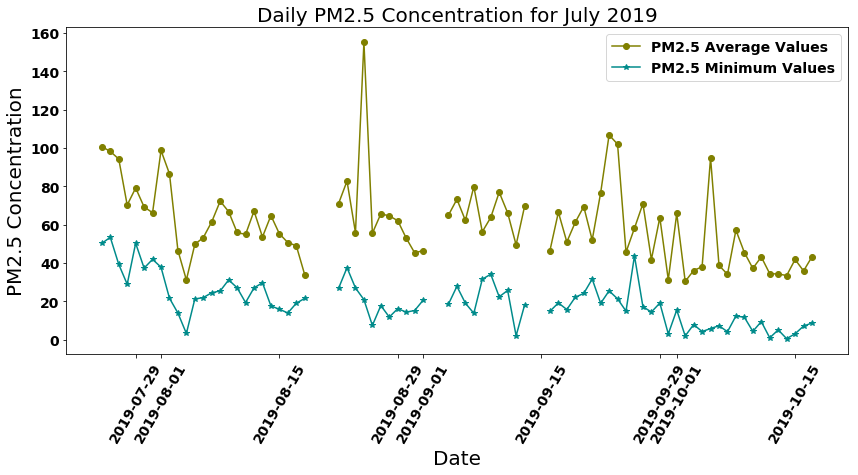

In [25]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(all_sensor_daily_airquality_data_concentrations_mean.index, 
             all_sensor_daily_airquality_data_concentrations_mean['Average_PM2.5_CF_1_ug/m3'], 
             color='olive', marker='o', linestyle='solid', label='PM2.5 Average Values')
    #plt.plot(all_sensor_daily_airquality_data_concentrations_max.index, 
             #all_sensor_daily_airquality_data_concentrations_max['Average_PM2.5_CF_1_ug/m3'], 
             #color='chocolate', marker='x', linestyle='solid', label='PM2.5 Maximum Values')
    plt.plot(all_sensor_daily_airquality_data_concentrations_min.index, 
             all_sensor_daily_airquality_data_concentrations_min['Average_PM2.5_CF_1_ug/m3'], 
             color='darkcyan', marker='*', linestyle='solid', label='PM2.5 Minimum Values')
    
    chart_title =  'Daily PM2.5 Concentration for July 2019'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5 Concentration', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=60)
    plt.legend()
    plt.show()
    fig.savefig(os.path.join(base_dir,'daily_pm25_concentration_airqo.png'))

### UNEP  DATA

In [41]:
us_embasy_data.head(10)

,val.pm1,val.pm2p5,val.pm10,rec
0,13.4,27.2,87.3,2019-10-07T21:00:14Z
1,13.1,30.8,67.1,2019-10-07T21:00:24Z
2,13.5,30.6,129.1,2019-10-07T21:00:34Z
3,13.2,28.4,94.3,2019-10-07T21:00:44Z
4,13.9,30.0,90.9,2019-10-07T21:00:54Z
5,13.4,29.2,122.2,2019-10-07T21:01:04Z
6,13.3,29.5,96.8,2019-10-07T21:01:14Z
7,13.4,27.8,75.3,2019-10-07T21:01:24Z
8,13.5,28.5,82.2,2019-10-07T21:01:34Z
9,13.4,26.2,83.7,2019-10-07T21:01:44Z


In [27]:
us_embasy_airquality_data_copy = us_embasy_data.copy()

print(us_embasy_airquality_data_copy.columns)
us_embasy_airquality_data_copy.rename(columns={'val.pm2p5':'PM2.5', 'val.pm10':'PM10'},inplace=True)

#print(airquality_data_copy.columns)
us_embasy_airquality_data_of_interest = us_embasy_airquality_data_copy.drop(['val.pm1'], axis=1)


us_embasy_airquality_data = us_embasy_airquality_data_of_interest

Index(['val.pm1', 'val.pm2p5', 'val.pm10', 'rec'], dtype='object')


In [28]:
us_embasy_airquality_data.drop_duplicates(subset ="rec", keep = 'first', inplace = True) 
us_embasy_airquality_data["TimeStamp"] = pd.to_datetime(us_embasy_airquality_data["rec"])
us_embasy_airquality_data["TimeStamp"] = us_embasy_airquality_data["TimeStamp"]+ datetime.timedelta(hours=3)
#us_embasy_airquality_data["TimeStampString"] = us_embasy_airquality_data["TimeStamp"].dt.strftime('%Y-%m-%d %H:%M:%S')
us_embasy_time_indexed_data = us_embasy_airquality_data.set_index('TimeStamp')
us_embasy_time_indexed_data = us_embasy_time_indexed_data.drop(['rec'], axis=1)

In [29]:
us_embasy_time_indexed_data.head()

,PM2.5,PM10
TimeStamp,,
2019-10-08 00:00:14,27.2,87.3
2019-10-08 00:00:24,30.8,67.1
2019-10-08 00:00:34,30.6,129.1
2019-10-08 00:00:44,28.4,94.3
2019-10-08 00:00:54,30.0,90.9


In [30]:
show_dataframe_info(us_embasy_time_indexed_data)

(51839, 2)
['PM2.5', 'PM10']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51839 entries, 2019-10-08 00:00:14 to 2019-10-13 23:59:54
Data columns (total 2 columns):
PM2.5    51839 non-null float64
PM10     51839 non-null float64
dtypes: float64(2)
memory usage: 1.2 MB

 dataframe info: 
 None

 dataframe column datatypes:
 PM2.5    float64
PM10     float64
dtype: object


In [27]:
#us_embasy_time_indexed_data.replace(-999, np.nan)

In [31]:
#us_embasy_time_indexed_data= us_embasy_time_indexed_data[us_embasy_time_indexed_data['PM2.5(Ug/m3)'] <= 500.4]
us_embasy_time_indexed_data = us_embasy_time_indexed_data[us_embasy_time_indexed_data['PM2.5'] > 0]

In [32]:
show_dataframe_info(us_embasy_time_indexed_data)

(51839, 2)
['PM2.5', 'PM10']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51839 entries, 2019-10-08 00:00:14 to 2019-10-13 23:59:54
Data columns (total 2 columns):
PM2.5    51839 non-null float64
PM10     51839 non-null float64
dtypes: float64(2)
memory usage: 1.2 MB

 dataframe info: 
 None

 dataframe column datatypes:
 PM2.5    float64
PM10     float64
dtype: object


In [30]:
#us_embasy_time_indexed_data.drop_duplicates(subset ="TimeStamp", keep = 'first', inplace = True) 

In [33]:
us_embasy_time_indexed_data.head()

,PM2.5,PM10
TimeStamp,,
2019-10-08 00:00:14,27.2,87.3
2019-10-08 00:00:24,30.8,67.1
2019-10-08 00:00:34,30.6,129.1
2019-10-08 00:00:44,28.4,94.3
2019-10-08 00:00:54,30.0,90.9


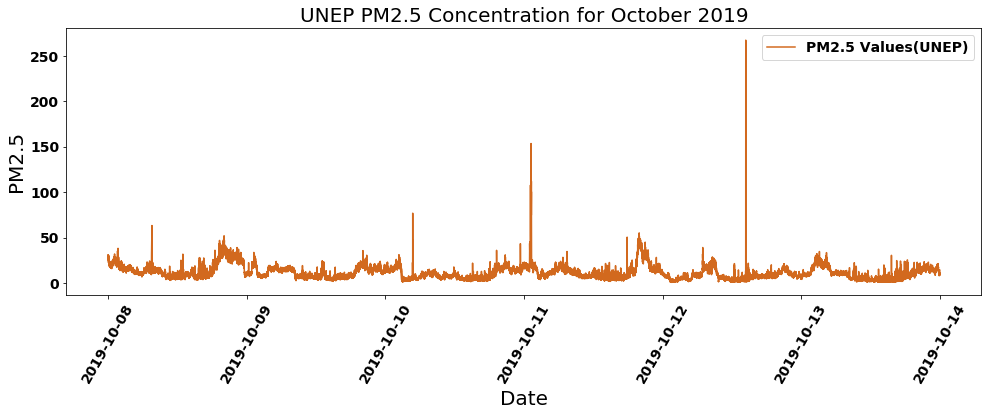

In [34]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(us_embasy_time_indexed_data.index, 
             us_embasy_time_indexed_data['PM2.5'], 
             color='chocolate', linestyle='solid', label='PM2.5 Values(UNEP)')
    
    chart_title =  'UNEP PM2.5 Concentration for October 2019'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=60)
    plt.legend()
    plt.tight_layout()
    plt.show()
    fig.savefig(os.path.join(base_dir,'hourly_pm25_concentration_unep_october_2019.png'))

In [35]:
unep_hourly_airquality_data_concentrations_std= us_embasy_time_indexed_data.resample('H').std().round(2)
unep_hourly_airquality_data_concentrations_mean  =us_embasy_time_indexed_data.resample('H').mean().round(2)
unep_hourly_airquality_data_concentrations_max  = us_embasy_time_indexed_data.resample('H').max().round(2)
unep_hourly_airquality_data_concentrations_min  = us_embasy_time_indexed_data.resample('H').min().round(2)

In [36]:
## get the lower boundary date from the daily airquality dataset
airqo_hourly_airquality_data_concentrations_mean.iloc[:1,:]
t= airqo_hourly_airquality_data_concentrations_mean.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
airqo_hourly_airquality_data_concentrations_mean_lower_boundary_date = z.strftime('%Y-%m-%d %H:%M:%S')

print(airqo_hourly_airquality_data_concentrations_mean_lower_boundary_date)
## get the upper boundary date from the daily airquality dataset
t = airqo_hourly_airquality_data_concentrations_mean.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
airqo_hourly_airquality_data_concentrations_mean_upper_boundary_date = z.strftime('%Y-%m-%d %H:%M:%S')
print(airqo_hourly_airquality_data_concentrations_mean_upper_boundary_date)

2019-07-25 09:00:00
2019-10-17 07:00:00


In [37]:
## get the lower boundary date from the daily airquality dataset
us_embasy_time_indexed_data.iloc[:1,:]
t= us_embasy_time_indexed_data.iloc[:1,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
us_embasy_time_indexed_data_lower_boundary_date = z.strftime('%Y-%m-%d %H:%M:%S')

print(us_embasy_time_indexed_data_lower_boundary_date)
## get the upper boundary date from the daily airquality dataset
t = us_embasy_time_indexed_data.iloc[-1:,:].index.values[0]
t = t.astype(datetime.datetime)
z= pd.to_datetime(t)
us_embasy_time_indexed_data_upper_boundary_date = z.strftime('%Y-%m-%d %H:%M:%S')
print(us_embasy_time_indexed_data_upper_boundary_date)

2019-10-08 00:00:14
2019-10-13 23:59:54


### obtaining us data in same date range as airqo

In [38]:
hourly_us_embasy_time_indexed_data_in_same_daterange_with_airqo_airquality_data= airqo_hourly_airquality_data_concentrations_mean[us_embasy_time_indexed_data_lower_boundary_date: us_embasy_time_indexed_data_upper_boundary_date]

In [39]:
hourly_us_embasy_time_indexed_data_in_same_daterange_with_airqo_airquality_data.head()

,Sensor1 PM2.5_CF_1_ug/m3,Sensor1 PM10_CF_1_ug/m3,Sensor2PM2.5_CF_1_ug/m3,Sensor2 PM10_CF_1_ug/m3,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3
TimeStamp,,,,,,
2019-10-08 01:00:00,72.72,81.88,72.61,82.37,72.67,82.13
2019-10-08 02:00:00,54.96,67.70,55.39,68.13,55.18,67.91
2019-10-08 03:00:00,55.88,68.11,57.11,69.47,56.50,68.79
2019-10-08 04:00:00,47.93,59.58,48.71,61.04,48.32,60.31
2019-10-08 05:00:00,48.79,59.70,49.14,60.65,48.97,60.17


In [304]:
#hourly_airquality_data.head()

In [41]:
hourly_airquality_data =  hourly_us_embasy_time_indexed_data_in_same_daterange_with_airqo_airquality_data
hourly_airquality_data  = hourly_airquality_data.drop(
['Sensor1 PM2.5_CF_1_ug/m3', 'Sensor1 PM10_CF_1_ug/m3',
       'Sensor2PM2.5_CF_1_ug/m3', 'Sensor2 PM10_CF_1_ug/m3' ], axis=1)
print(hourly_airquality_data.shape)
hourly_timestamp = hourly_airquality_data.index.values
print(len(hourly_timestamp))
hourly_airquality_data["TimeStamp"] = hourly_timestamp
print(hourly_airquality_data.columns)
hourly_airquality_data["TimeStamp"] = pd.to_datetime(hourly_airquality_data["TimeStamp"])
print(hourly_airquality_data.shape)

# month and year for merging with vi data
hourly_airquality_data['MonthOfYear'] = pd.to_datetime(hourly_timestamp).strftime('%m-%Y') 
hourly_airquality_data.head()

(143, 2)
143
Index(['Average_PM2.5_CF_1_ug/m3', 'Average_PM10_CF_1_ug/m3', 'TimeStamp'], dtype='object')
(143, 3)


,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3,TimeStamp,MonthOfYear
TimeStamp,,,,
2019-10-08 01:00:00,72.67,82.13,2019-10-08 01:00:00,10-2019
2019-10-08 02:00:00,55.18,67.91,2019-10-08 02:00:00,10-2019
2019-10-08 03:00:00,56.50,68.79,2019-10-08 03:00:00,10-2019
2019-10-08 04:00:00,48.32,60.31,2019-10-08 04:00:00,10-2019
2019-10-08 05:00:00,48.97,60.17,2019-10-08 05:00:00,10-2019


In [42]:
hourly_airquality_data.head()

,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3,TimeStamp,MonthOfYear
TimeStamp,,,,
2019-10-08 01:00:00,72.67,82.13,2019-10-08 01:00:00,10-2019
2019-10-08 02:00:00,55.18,67.91,2019-10-08 02:00:00,10-2019
2019-10-08 03:00:00,56.50,68.79,2019-10-08 03:00:00,10-2019
2019-10-08 04:00:00,48.32,60.31,2019-10-08 04:00:00,10-2019
2019-10-08 05:00:00,48.97,60.17,2019-10-08 05:00:00,10-2019


In [43]:
#shifted airquality data
#hourly_airquality_data= hourly_airquality_data.shift(1, axis = 0)
hourly_airquality_data.head(10)

,Average_PM2.5_CF_1_ug/m3,Average_PM10_CF_1_ug/m3,TimeStamp,MonthOfYear
TimeStamp,,,,
2019-10-08 01:00:00,72.67,82.13,2019-10-08 01:00:00,10-2019
2019-10-08 02:00:00,55.18,67.91,2019-10-08 02:00:00,10-2019
2019-10-08 03:00:00,56.50,68.79,2019-10-08 03:00:00,10-2019
2019-10-08 04:00:00,48.32,60.31,2019-10-08 04:00:00,10-2019
2019-10-08 05:00:00,48.97,60.17,2019-10-08 05:00:00,10-2019
2019-10-08 06:00:00,58.85,69.72,2019-10-08 06:00:00,10-2019
2019-10-08 07:00:00,75.47,85.82,2019-10-08 07:00:00,10-2019
2019-10-08 08:00:00,56.74,68.70,2019-10-08 08:00:00,10-2019
2019-10-08 09:00:00,49.96,61.33,2019-10-08 09:00:00,10-2019


In [44]:
hourly_us_embassy_data =  unep_hourly_airquality_data_concentrations_mean
print(hourly_us_embassy_data.shape)
hourly_timestamp = hourly_us_embassy_data.index.values
#print(len(hourly_timestamp))
hourly_us_embassy_data["TimeStamp"] = hourly_timestamp
#print(hourly_meteorology_data.columns)
hourly_us_embassy_data["TimeStamp"] = pd.to_datetime(hourly_us_embassy_data["TimeStamp"])
print(hourly_us_embassy_data.shape)

(144, 2)
(144, 3)


In [45]:
hourly_us_embassy_data.head()

,PM2.5,PM10,TimeStamp
TimeStamp,,,
2019-10-08 00:00:00,21.79,76.23,2019-10-08 00:00:00
2019-10-08 01:00:00,24.21,80.97,2019-10-08 01:00:00
2019-10-08 02:00:00,16.92,47.77,2019-10-08 02:00:00
2019-10-08 03:00:00,16.05,42.29,2019-10-08 03:00:00
2019-10-08 04:00:00,12.66,31.10,2019-10-08 04:00:00


In [52]:
hourly_combined_airquality_airqo_us_embassy_dataset= pd.merge(hourly_airquality_data, hourly_us_embassy_data, on='TimeStamp')
hourly_combined_airquality_airqo_us_embassy_dataset= hourly_combined_airquality_airqo_us_embassy_dataset.drop(['MonthOfYear'], axis=1)
hourly_combined_airquality_airqo_us_embassy_dataset =hourly_combined_airquality_airqo_us_embassy_dataset.set_index('TimeStamp')

hourly_combined_airquality_airqo_us_embassy_dataset.rename(
    columns={'Average_PM2.5_CF_1_ug/m3':'AirQo PM2.5','PM2.5':'UNEP PM2.5', 
                                     },inplace=True)
hourly_combined_airquality_airqo_us_embassy_dataset.head()

hourly_combined_airquality_airqo_us_embassy_dataset.to_csv(os.path.join(base_dir,'hourly_pm25_concentration_airqo_vs_unep_october_2019_updated.csv'))

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\IPython\core\interactiveshell.py:3267: FutureWarning: 'TimeStamp' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


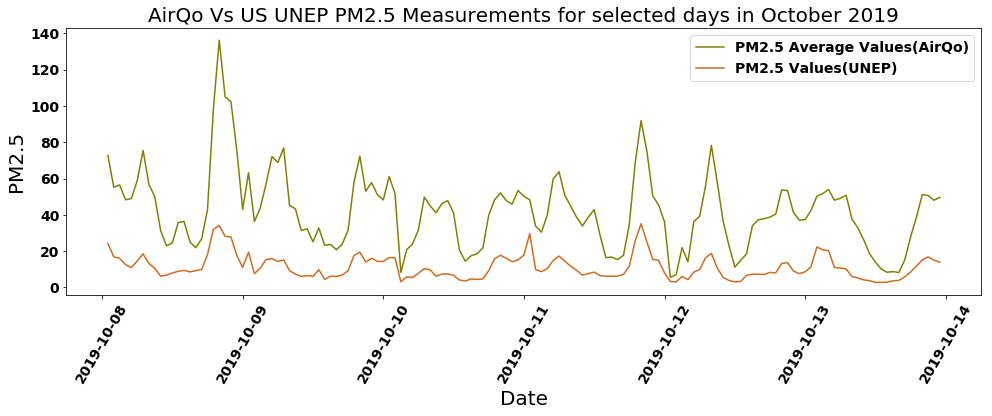

In [47]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(hourly_combined_airquality_airqo_us_embassy_dataset.index, 
             hourly_combined_airquality_airqo_us_embassy_dataset['AirQo PM2.5'], 
             color='olive', linestyle='solid', label='PM2.5 Average Values(AirQo)') #marker='o', 
    plt.plot(hourly_combined_airquality_airqo_us_embassy_dataset.index, 
             hourly_combined_airquality_airqo_us_embassy_dataset['UNEP PM2.5'], 
             color='chocolate', linestyle='solid', label='PM2.5 Values(UNEP)') # marker='x',
    #plt.plot(airqo_hourly_airquality_data_concentrations_min.index, 
             #airqo_hourly_airquality_data_concentrations_min['Average_PM2.5_CF_1_ug/m3'], 
             #color='darkcyan', marker='*', linestyle='solid', label='PM2.5 Minimum Values')
    
    chart_title =  'AirQo Vs US UNEP PM2.5 Measurements for selected days in October 2019'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=60)
    plt.legend()
    plt.tight_layout()
    plt.show()
    fig.savefig(os.path.join(base_dir,'hourly_pm25_concentration_airqo_unep_selected_days_in_october_2019.png'))

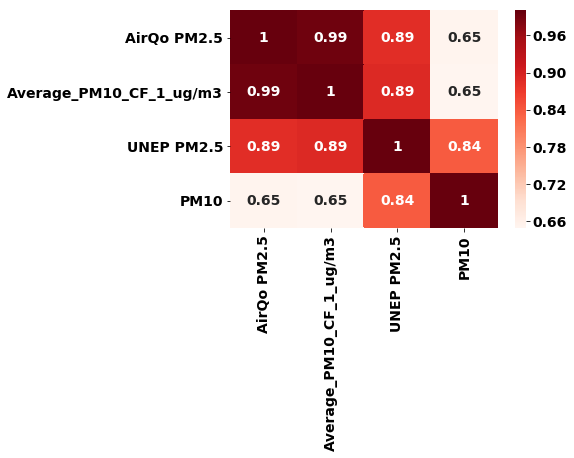

0.885693397100115

In [48]:
import seaborn as sns;
hourly_correlations =hourly_combined_airquality_airqo_us_embassy_dataset.corr()
hourly_correlations.to_csv(os.path.join(base_dir, 'hourly_correlations_unep_us_embassy.csv'))
corx = hourly_combined_airquality_airqo_us_embassy_dataset['AirQo PM2.5'].corr(hourly_combined_airquality_airqo_us_embassy_dataset['UNEP PM2.5'])
all_features_corr_plot = sns.heatmap(hourly_correlations, annot=True, cmap=plt.cm.Reds)
correlation_plot_figure = all_features_corr_plot.get_figure()    
correlation_plot_figure.savefig(os.path.join(base_dir ,"correlation_pm25_airqo_unep_heatmap_plot.png"))
plt.show()
corx

In [49]:
#hourly_combined_airquality_airqo_us_embassy_dataset['AirQo PM2.5'].shift(1)

In [50]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [51]:
crosscorr(hourly_combined_airquality_airqo_us_embassy_dataset['AirQo PM2.5'],hourly_combined_airquality_airqo_us_embassy_dataset['US Embassy PM2.5'], lag=-1)

KeyError: 'US Embassy PM2.5'

In [ ]:
daily_mean = all_sensor_daily_airquality_data_concentrations_mean['Average_PM2.5_CF_1_ug/m3']
daily_max = all_sensor_daily_airquality_data_concentrations_max['Average_PM2.5_CF_1_ug/m3']
daily_min = all_sensor_daily_airquality_data_concentrations_min['Average_PM2.5_CF_1_ug/m3']
daily_std = all_sensor_daily_airquality_data_concentrations_std['Average_PM2.5_CF_1_ug/m3']

ind = np.arange(len(all_sensor_daily_airquality_data_concentrations_mean))
width = 0.36
#0.525
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind- width/2, daily_min, width, color='darkcyan', label='PM2.5 Minimum Concentration')
rects3 = ax.bar(ind + width, daily_mean, width, color='olive', label='PM2.5 Average Concentration')
rects2 = ax.bar(ind+ width/4,  daily_max, width, color='chocolate',label='PM2.5 Maximum Concentration')
 
ax.set_ylabel('PM2.5 Concentration',fontsize=16)
ax.set_title('Daily PM2.5 Concentration for July 2019', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticks(ind)
x_tick_labels = pd.to_datetime(all_sensor_daily_airquality_data_concentrations_mean.index)
final_labels= []
for x in x_tick_labels:
    final_labels.append(x.strftime('%a %d-%b'))
ax.set_xticklabels(final_labels, rotation='vertical', fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig( 'daily_pm25_concentration_bargraph_July.png')


In [ ]:
x_tick_labels = pd.to_datetime(all_sensor_daily_airquality_data_concentrations_mean.index)
x_tick_labels

In [ ]:
weekly_average_concentrations  = time_indexed_data.resample('W').mean().round(2)
weekly_median_concentrations  = time_indexed_data.resample('W').median()
weekly_maximum_concentrations  = time_indexed_data.resample('W').max()
weekly_minimum_concentrations  = time_indexed_data.resample('W').min()

In [ ]:
weekly_average_concentrations

In [ ]:
weekly_average_concentrations.index.values

In [ ]:
pm25 = weekly_average_concentrations['Average_PM2.5_CF_1_ug/m3']
pm25
#pm25.to_csv(os.path.join(entire_dataset_measurements_path , 'weekly_pm25_values_July.csv'))

### Todays records
- first specify date for the records that you want.
- setup folder structure where results shall be saved.
- save results for the entire dataset
- make calculations for the specified date records and save results

In [ ]:
operation_hours_folder = 'Operational_Hours_Measurements_9AM_9PM'
twenty_four_hours_folder = '24_Hour_Measurements'
entire_dataset_Measurements = 'Entire_Dataset_Measurements'
hourly_measurements =  'Hourly_Measurements'

specified_date = create_folder_name_representing_date('2019-08-01 00:00:00')
daily_date = specified_date
all_thursday_daily_records = time_indexed_data['2019-08-01 00:00:00':'2019-08-01 23:59:59']
all_operational_hours_daily_records = time_indexed_data['2019-08-01 09:00:00':'2019-08-01 21:00:00']

operation_hours_directory_path = os.path.join(base_dir , operation_hours_folder , specified_date) 
twenty_four_hours_directory_path = os.path.join(base_dir , twenty_four_hours_folder  , specified_date)
entire_dataset_measurements_path = os.path.join(base_dir ,entire_dataset_Measurements ,specified_date)
twenty_four_hours_hourly_directory_path = os.path.join(twenty_four_hours_directory_path , hourly_measurements )
operation_hours_hourly_directory_path = os.path.join(operation_hours_directory_path ,hourly_measurements)

create_directory(entire_dataset_measurements_path)
create_directory(operation_hours_directory_path)
create_directory(twenty_four_hours_directory_path)
create_directory(operation_hours_hourly_directory_path)
create_directory(twenty_four_hours_hourly_directory_path)

In [ ]:
all_sensor_daily_airquality_data_concentrations_std.to_csv(os.path.join(entire_dataset_measurements_path , 'daily_standard_deviation_values.csv'))
all_sensor_daily_airquality_data_concentrations_mean.to_csv(os.path.join(entire_dataset_measurements_path , 'daily_average_values.csv'))
all_sensor_daily_airquality_data_concentrations_median.to_csv(os.path.join(entire_dataset_measurements_path,'daily_median_values.csv'))
all_sensor_daily_airquality_data_concentrations_max.to_csv(os.path.join(entire_dataset_measurements_path , 'daily_maximum_values.csv'))
all_sensor_daily_airquality_data_concentrations_min.to_csv(os.path.join(entire_dataset_measurements_path ,'daily_minimum_values.csv'))


In [ ]:
daily_hourly_average_data = all_thursday_daily_records.resample('H').mean().round(2)
daily_hourly_median_data  = all_thursday_daily_records.resample('H').median().round(2)
daily_hourly_maximum_data = all_thursday_daily_records.resample('H').max().round(2)
daily_hourly_minimum_data = all_thursday_daily_records.resample('H').min().round(2)
daily_hourly_std_data     = all_thursday_daily_records.resample('H').std().round(2)

daily_operational_hourly_average_data = all_operational_hours_daily_records.resample('H').mean().round(2)
daily_operational_hourly_median_data  = all_operational_hours_daily_records.resample('H').median().round(2)
daily_operational_hourly_maximum_data = all_operational_hours_daily_records.resample('H').max().round(2)
daily_operational_hourly_minimum_data = all_operational_hours_daily_records.resample('H').min().round(2)
daily_operational_hourly_std_data     = all_operational_hours_daily_records.resample('H').std().round(2)



In [ ]:
pm25.to_csv(os.path.join(entire_dataset_measurements_path , 'weekly_pm25_values_july.csv'))

In [ ]:
daily_hourly_average_data.head()

In [ ]:
print(all_thursday_daily_records.shape)
all_thursday_daily_records.to_csv(os.path.join(twenty_four_hours_directory_path,daily_date+'_all_records.csv'))
all_thursday_daily_records.head()

In [ ]:
print(all_operational_hours_daily_records.shape)
all_operational_hours_daily_records.to_csv(os.path.join(operation_hours_directory_path, daily_date+'_operational_hours_all_records.csv'))
all_operational_hours_daily_records.head()

In [ ]:
## ensure to only perform calculations on dataframe with some records in it i.e records > 0
if all_thursday_daily_records.shape[0] > 0:
    max_record_sensor1_pm25_cf_1 = all_thursday_daily_records.loc[all_thursday_daily_records['Sensor1 PM2.5_CF_1_ug/m3'].idxmax()]
    max_record_sensor1_pm10_cf_1 = all_thursday_daily_records.loc[all_thursday_daily_records['Sensor1 PM10_CF_1_ug/m3'].idxmax()]
    
    max_record_sensor2_pm25_cf_1 = all_thursday_daily_records.loc[all_thursday_daily_records['Sensor2PM2.5_CF_1_ug/m3'].idxmax()]
    max_record_sensor2_pm10_cf_1 = all_thursday_daily_records.loc[all_thursday_daily_records['Sensor2 PM10_CF_1_ug/m3'].idxmax()]
    
    max_record_average_sensor1_pm25_sensor2_pm25 = all_thursday_daily_records.loc[all_thursday_daily_records['Average_PM2.5_CF_1_ug/m3'].idxmax()]
    max_record_average_sensor1_pm10_sensor2_pm10 = all_thursday_daily_records.loc[all_thursday_daily_records['Average_PM10_CF_1_ug/m3'].idxmax()]

    min_record_average_sensor1_pm25_sensor2_pm25 = all_thursday_daily_records.loc[all_thursday_daily_records['Average_PM2.5_CF_1_ug/m3'].idxmin()]
    min_record_average_sensor1_pm10_sensor2_pm10 = all_thursday_daily_records.loc[all_thursday_daily_records['Average_PM10_CF_1_ug/m3'].idxmin()]

    
    min_record_sensor1_pm25_cf_1 = all_thursday_daily_records.loc[all_thursday_daily_records['Sensor1 PM2.5_CF_1_ug/m3'].idxmin()]
    min_record_sensor1_pm10_cf_1 = all_thursday_daily_records.loc[all_thursday_daily_records['Sensor1 PM10_CF_1_ug/m3'].idxmin()]

    min_record_sensor2_pm25_cf_1 = all_thursday_daily_records.loc[all_thursday_daily_records['Sensor2PM2.5_CF_1_ug/m3'].idxmin()]
    min_record_sensor2_pm10_cf_1 = all_thursday_daily_records.loc[all_thursday_daily_records['Sensor2 PM10_CF_1_ug/m3'].idxmin()]
    
    print('mean values')
    daily_mean = all_thursday_daily_records.mean()
    print(daily_mean)
    daily_mean.to_csv(os.path.join(twenty_four_hours_directory_path , daily_date+'_24hr_average_values.csv'))

    print('max values')
    daily_max = all_thursday_daily_records.max()
    print(daily_max)
    daily_max.to_csv(os.path.join(twenty_four_hours_directory_path , daily_date+'_24hr_maximum_values.csv'))

    print('median values')
    daily_median = all_thursday_daily_records.median()
    print(daily_median)
    daily_median.to_csv(os.path.join(twenty_four_hours_directory_path , daily_date+'_24hr_median_values.csv'))

    print('min values')
    daily_min = all_thursday_daily_records.min()
    print(daily_min)
    daily_min.to_csv(os.path.join(twenty_four_hours_directory_path , daily_date+'_24hr_minimum_values.csv'))

    print('std values')
    daily_std = all_thursday_daily_records.std()
    daily_std
    daily_std.to_csv(os.path.join(twenty_four_hours_directory_path, daily_date+'_24hr_standard_deviation_values.csv'))


In [ ]:
with open(os.path.join(twenty_four_hours_directory_path,daily_date+"_summary.txt"), "w+") as text_file:
    print("Total Number of records: {}".format(all_thursday_daily_records.shape[0]), file=text_file)
    
    if all_thursday_daily_records.shape[0] > 0:
        print('Time when Sensor1 PM2.5_CF_1_ug/m3 recorded maximum value: {}\n\nTime when Sensor1 PM10_CF_1_ug/m3 recorded maximum value: {}\n'
              .format(max_record_sensor1_pm25_cf_1.name.strftime('%H:%M:%S %p'), max_record_sensor1_pm10_cf_1.name.strftime('%H:%M:%S %p')),  file=text_file)
        
        print('Time when Sensor1 PM2.5_CF_1_ug/m3 recorded minimum value: {}\n\nTime when  Sensor1 PM10_CF_1_ug/m3 recorded minimum value: {}\n'
              .format(min_record_sensor1_pm25_cf_1.name.strftime('%H:%M:%S %p'), min_record_sensor1_pm10_cf_1.name.strftime('%H:%M:%S %p')),  file=text_file)

        print('Time when Sensor2PM2.5_CF_1_ug/m3 recorded maximum value: {}\n\nTime when Sensor2 PM10_CF_1_ug/m3 recorded maximum value: {}\n'
              .format(max_record_sensor2_pm25_cf_1.name.strftime('%H:%M:%S %p'), max_record_sensor2_pm10_cf_1.name.strftime('%H:%M:%S %p')),  file=text_file)

        print('Time when Sensor2PM2.5_CF_1_ug/m3 recorded minimum value: {}\n\nTime when sensor Sensor2 PM10_CF_1_ug/m3 recorded minimum value: {}\n'
              .format(min_record_sensor2_pm25_cf_1.name.strftime('%H:%M:%S %p'), min_record_sensor2_pm10_cf_1.name.strftime('%H:%M:%S %p')),  file=text_file)
        
        print('Time when Average of Sensor1 PM2.5_CF_1_ug/m3 and Sensor2PM2.5_CF_1_ug/m3 had maximum value: {}\n\nTime when Average of Sensor1 PM10_CF_1_ug/m3 and Sensor2PM10_CF_1_ug/m3 had maximum value: {}\n'
              .format(max_record_average_sensor1_pm25_sensor2_pm25.name.strftime('%H:%M:%S %p'),  max_record_average_sensor1_pm10_sensor2_pm10.name.strftime('%H:%M:%S %p')),  file=text_file)

        print('Time when Average of Sensor1 PM2.5_CF_1_ug/m3 and Sensor2PM2.5_CF_1_ug/m3 had minimum value: {}\n\nTime when Average of Sensor1 PM10_CF_1_ug/m3 and Sensor2PM10_CF_1_ug/m3 had minimum value: {}\n'
              .format(min_record_average_sensor1_pm25_sensor2_pm25.name.strftime('%H:%M:%S %p'),  min_record_average_sensor1_pm10_sensor2_pm10.name.strftime('%H:%M:%S %p')),  file=text_file)



### graphs

In [ ]:
def make_simple_line_chart(x_axis_data,y_axis_data, x_axis_label,y_axis_label, chart_title, saved_fig_full_filepath='chart'):
    fig = plt.figure(figsize=(24,12))
    ax = fig.add_subplot(111)
    plt.plot(x_axis_data, y_axis_data, color='blue', marker='o', linestyle='solid')
    chart_title = graph_title + " " + chart_title
    plt.title(chart_title)
    plt.ylabel(y_axis_label)
    plt.xlabel(x_axis_label)
    
    hours = mdates.HourLocator(interval = 1)
    hour_format = mdates.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hour_format)
   
    plt.show()
    fig.savefig(saved_fig_full_filepath + '.png')
    

In [ ]:
daily_hourly_median_values = daily_hourly_median_data.values
for col in value_columns:
    y_axis_values = daily_hourly_median_values[:, col]
    x_axis_values = daily_hourly_median_data.index
    x_axis_label = 'Hour of the Day'
    y_axis_label =  daily_hourly_median_data.columns[col]
    chart_title  =  daily_hourly_median_data.columns[col]+ ' Daily Hourly Median Values'
    file_path    =  os.path.join(twenty_four_hours_hourly_directory_path, daily_date+ '_' +'daily_hourly_median_trend_' +
                                 remove_special_characters(daily_hourly_median_data.columns[col]))
    
    make_simple_line_chart(x_axis_values, y_axis_values, x_axis_label, y_axis_label, chart_title ,file_path)
   


In [ ]:
daily_hourly_minimum_values = daily_hourly_minimum_data.values
for col in value_columns:
    y_axis_values = daily_hourly_minimum_values[:, col]
    x_axis_values = daily_hourly_minimum_data.index
    x_axis_label = 'Hour of the Day'
    y_axis_label =  daily_hourly_minimum_data.columns[col]
    chart_title  =  daily_hourly_minimum_data.columns[col]+ ' Daily Hourly Minimum Values'
    file_path    =  os.path.join(twenty_four_hours_hourly_directory_path, daily_date+ '_' +'daily_hourly_minimum_trend_' +
                                 remove_special_characters(daily_hourly_minimum_data.columns[col]))
    
    make_simple_line_chart(x_axis_values, y_axis_values, x_axis_label, y_axis_label, chart_title ,file_path)
   


In [ ]:
daily_hourly_std_values = daily_hourly_std_data.values
for col in value_columns:
    y_axis_values = daily_hourly_std_values[:, col]
    x_axis_values = daily_hourly_std_data.index
    x_axis_label = 'Hour of the Day'
    y_axis_label =  daily_hourly_std_data.columns[col]
    chart_title  =  daily_hourly_std_data.columns[col]+ ' Daily Hourly Standard Deviation Values'
    file_path    =  os.path.join(twenty_four_hours_hourly_directory_path, daily_date+ '_' +'daily_hourly_std_trend_' +
                                 remove_special_characters(daily_hourly_std_data.columns[col]))
    
    make_simple_line_chart(x_axis_values, y_axis_values, x_axis_label, y_axis_label, chart_title ,file_path)
   

In [ ]:
daily_hourly_std_data.to_csv(os.path.join(twenty_four_hours_hourly_directory_path, daily_date+ '_'+ 'hourly_standard_deviation_values.csv'))
daily_hourly_average_data.to_csv(os.path.join(twenty_four_hours_hourly_directory_path, daily_date+ '_'+'hourly_average_values.csv'))
daily_hourly_median_data.to_csv(os.path.join(twenty_four_hours_hourly_directory_path, daily_date+ '_' +'hourly_median_values.csv'))
daily_hourly_maximum_data.to_csv(os.path.join(twenty_four_hours_hourly_directory_path, daily_date+ '_' + 'hourly_maximum_values.csv'))
daily_hourly_minimum_data.to_csv(os.path.join(twenty_four_hours_hourly_directory_path, daily_date+ '_' +'hourly_minimum_values.csv'))

In [ ]:
daily_operational_hourly_average_values = daily_operational_hourly_average_data.values
for col in value_columns:
    y_axis_values = daily_operational_hourly_average_values[:, col]
    x_axis_values = daily_operational_hourly_average_data.index
    x_axis_label = 'Hour of the Day'
    y_axis_label =  daily_operational_hourly_average_data.columns[col]
    chart_title  =  daily_operational_hourly_average_data.columns[col]+ ' Daily Hourly Average Values For Operation Hours'
    file_path    =  os.path.join(operation_hours_hourly_directory_path, daily_date+ '_' +'daily_operational_hourly_average_trend_' 
                                 + remove_special_characters(daily_operational_hourly_average_data.columns[col]))
    
    make_simple_line_chart(x_axis_values, y_axis_values, x_axis_label, y_axis_label, chart_title ,file_path)

In [ ]:
daily_operational_hourly_maximum_values = daily_operational_hourly_maximum_data.values
for col in value_columns:
    y_axis_values = daily_operational_hourly_maximum_values[:, col]
    x_axis_values = daily_operational_hourly_maximum_data.index
    x_axis_label = 'Hour of the Day'
    y_axis_label =  daily_operational_hourly_maximum_data.columns[col]
    chart_title  =  daily_operational_hourly_maximum_data.columns[col]+ ' Daily Hourly Maximum Values For Operation Hours'
    file_path    =  os.path.join(operation_hours_hourly_directory_path, daily_date+ '_' +'daily_operational_hourly_maximum_trend_' 
                                 + remove_special_characters(daily_operational_hourly_maximum_data.columns[col]))
    
    make_simple_line_chart(x_axis_values, y_axis_values, x_axis_label, y_axis_label, chart_title ,file_path)

In [ ]:
daily_operational_hourly_median_values = daily_operational_hourly_median_data.values
for col in value_columns:
    y_axis_values = daily_operational_hourly_median_values[:, col]
    x_axis_values = daily_operational_hourly_median_data.index
    x_axis_label = 'Hour of the Day'
    y_axis_label =  daily_operational_hourly_median_data.columns[col]
    chart_title  =  daily_operational_hourly_median_data.columns[col]+ ' Daily Hourly Median Values For Operation Hours'
    file_path    =  os.path.join(operation_hours_hourly_directory_path, daily_date+ '_' +'daily_operational_hourly_median_trend_' 
                                 + remove_special_characters(daily_operational_hourly_median_data.columns[col]))
    
    make_simple_line_chart(x_axis_values, y_axis_values, x_axis_label, y_axis_label, chart_title ,file_path)

In [ ]:
daily_operational_hourly_minimum_values = daily_operational_hourly_minimum_data.values
for col in value_columns:
    y_axis_values = daily_operational_hourly_minimum_values[:, col]
    x_axis_values = daily_operational_hourly_minimum_data.index
    x_axis_label = 'Hour of the Day'
    y_axis_label =  daily_operational_hourly_minimum_data.columns[col]
    chart_title  =  daily_operational_hourly_minimum_data.columns[col]+ ' Daily Hourly Minimum Values For Operation Hours'
    file_path    =  os.path.join(operation_hours_hourly_directory_path, daily_date+ '_' +'daily_operational_hourly_minimum_trend_' +
                                 remove_special_characters(daily_operational_hourly_minimum_data.columns[col]))
    
    make_simple_line_chart(x_axis_values, y_axis_values, x_axis_label, y_axis_label, chart_title ,file_path)

In [ ]:
daily_operational_hourly_std_values = daily_operational_hourly_std_data.values
for col in value_columns:
    y_axis_values = daily_operational_hourly_std_values[:, col]
    x_axis_values = daily_operational_hourly_std_data.index
    x_axis_label = 'Hour of the Day'
    y_axis_label =  daily_operational_hourly_std_data.columns[col]
    chart_title  =  daily_operational_hourly_std_data.columns[col]+ ' Daily Hourly Standard Deviation Values For Operation Hours'
    file_path    =  os.path.join(operation_hours_hourly_directory_path, daily_date+ '_' +'daily_operational_hourly_std_trend_' +
                                 remove_special_characters(daily_operational_hourly_std_data.columns[col]))
    
    make_simple_line_chart(x_axis_values, y_axis_values, x_axis_label, y_axis_label, chart_title ,file_path)

In [ ]:
daily_operational_hourly_std_data.to_csv(os.path.join(operation_hours_hourly_directory_path, daily_date+ '_'+ 'hourly_standard_deviation_values.csv'))
daily_operational_hourly_average_data.to_csv(os.path.join(operation_hours_hourly_directory_path, daily_date+ '_'+'hourly_average_values.csv'))
daily_operational_hourly_median_data.to_csv(os.path.join(operation_hours_hourly_directory_path, daily_date+ '_' +'hourly_median_values.csv'))
daily_operational_hourly_maximum_data.to_csv(os.path.join(operation_hours_hourly_directory_path, daily_date+ '_' + 'hourly_maximum_values.csv'))
daily_operational_hourly_minimum_data.to_csv(os.path.join(operation_hours_hourly_directory_path, daily_date+ '_' +'hourly_minimum_values.csv'))

In [ ]:
values = all_thursday_daily_records.values
groups = [0,1,2, 3,4,5]
i = 1

fig = plt.figure(figsize=(24,24))
for group in groups:
    ax = fig.add_subplot(len(groups), 1, i)
    plt.plot(all_thursday_daily_records.index,values[:, group])
    plt.title(graph_title + " " + all_thursday_daily_records.columns[group], loc='right', y=0.7)
    plt.xlabel('Hours of the Day')
    plt.ylabel(all_thursday_daily_records.columns[group])
    
    hours = mdates.HourLocator(interval = 1)
    hour_format = mdates.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hour_format)
    
    i += 1
plt.show()
fig.savefig(os.path.join(twenty_four_hours_directory_path, daily_date + '_24hr_daily_trend'+ '.png'))

In [ ]:
values = all_thursday_daily_records.values
groups = [0,1,2, 3,4,5]

for col in groups:
    plot_values = values[:, col]
    fg = plt.figure(figsize=(28,10))
    ax = fg.add_subplot(111)
    plt.plot(all_thursday_daily_records.index, plot_values)
    plt.title(graph_title + " " + all_thursday_daily_records.columns[col] + ' Trend')
    plt.xlabel('Operation Hours')
    plt.ylabel(all_thursday_daily_records.columns[col])
    
    hours = mdates.HourLocator(interval = 1)
    hour_format = mdates.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hour_format)
    
    plt.show()
    fg.savefig(os.path.join(twenty_four_hours_directory_path, daily_date + '_'+'daily_trend_'+ 
               remove_special_characters(all_thursday_daily_records.columns[col]) + '.png'))
    